#Simple Neural Networks

In this section, we build and train a simple feedforward neural network on the MNIST handwritten digits dataset using TensorFlow/Keras.

### Loading the MNIST Dataset

We load the dataset of 60,000 training images and 10,000 testing images, each of size 28×28 pixels.  
The pixel values are normalized between 0 and 1 by dividing by 255.  
The labels are converted into **one-hot encoded vectors** (10 classes for digits 0–9).


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

### Checking Labels

Printing the shape of `y_train` shows `(60000, 10)`, meaning each label is represented as a 10-dimensional one-hot vector.  
Example: `array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])` corresponds to digit **5**.


In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Visualizing the Data

Here, we plot one of the training images (`x_train[5]`) with its corresponding label to confirm the preprocessing.


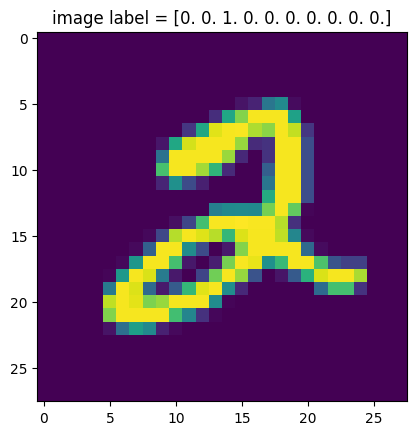

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

### Building a Simple Neural Network

We define a sequential model with:
- **Flatten layer**: converts 28×28 images into a 784-dimensional vector.
- **Dense layer (5 neurons, ReLU)**: a small hidden layer with non-linear activation.
- **Dense layer (10 neurons, Softmax)**: the output layer for classification into 10 categories.


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
model=Sequential([
    Flatten(input_shape=(28,28)), #Input Layers = 28 * 28
    Dense(5, activation='relu'), #Hidden Layers -> 5 neurons
    Dense(10, activation='softmax') #Output Layers -> 10 neurons
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Summary

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

The summary shows:
- 784 → 5 hidden connections (~3,925 parameters).
- Hidden → output (5×10 = 50 parameters + biases).  
In total: **3,985 trainable parameters**.


### Compiling and Training

We use:
- **Optimizer**: Adam (adaptive learning rate).
- **Loss function**: Categorical crossentropy (since it is multi-class classification).
- **Metric**: Accuracy.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.7035 - loss: 0.9021
Epoch 2/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8447 - loss: 0.5288
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8613 - loss: 0.4776
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8695 - loss: 0.4511
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8749 - loss: 0.4326


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8540 - loss: 0.4725


[0.42998257279396057, 0.8737000226974487]

Training runs for 5 epochs with batch size 32.  
Results show training accuracy gradually improving from ~70% to ~87%.


### Saving the Model

We save the trained model to an `.h5` file (`mnist.h5`).  
This allows reloading the weights later without retraining.


In [ ]:
model.save('mnist.h5')

### Inspecting Learned Weights

The trained model weights are displayed.  
These represent the learned numerical values for each connection in the network.


In [ ]:
model.get_weights()

[array([[ 0.06345822, -0.0356668 ,  0.06805521,  0.02168232, -0.07741133],
        [ 0.05579235,  0.03241235,  0.02741467,  0.0453781 , -0.04908988],
        [ 0.07438569,  0.00015598,  0.03980193, -0.04389903,  0.08281277],
        ...,
        [-0.02392846, -0.07382321,  0.05328816,  0.02332099,  0.05298515],
        [ 0.03441925, -0.06149837, -0.06992392,  0.00177009,  0.08192207],
        [-0.06804054, -0.08133249, -0.07981464,  0.07221982, -0.05126149]],
       dtype=float32),
 array([ 0.4524871 , -0.00081518,  0.21580406, -0.00377761, -0.14481574],
       dtype=float32),
 array([[-0.13588028,  1.0691215 ,  0.17606649,  0.814839  , -1.7208599 ,
          0.31690747, -0.90678334, -0.0172749 ,  0.08542485, -0.4504353 ],
        [ 0.7183279 , -1.0930523 , -0.14545292, -0.12897585,  0.2516475 ,
          0.60977733,  0.663629  , -0.5223245 ,  0.32968733, -0.04751423],
        [ 0.21717806, -0.88136566,  0.5926268 , -0.81184256, -0.4908811 ,
         -1.268466  , -0.09018126,  1.087387

#Complex Neural Networks

Now, we build a deeper model using Keras Functional API to allow more complex architectures.

In [ ]:
from keras.models import Model

In [ ]:
from keras.layers import Input, Flatten, Dense, concatenate

In [ ]:
input_layer=Input(shape=(28,28))
flatten=Flatten()(input_layer)

### Defining a Custom Model

- **Input**: 28×28 images.
- **Flatten**: converts images to vectors.
- **Two branches**:
  - Dense(128, ReLU) → Dense(64, ReLU).
  - Dense(160, ReLU).
- **Concatenation**: merges both branches.
- **Output**: Dense(10, Softmax).


In [ ]:
hidden_1=Dense(128, activation='relu')(flatten)
hidden_2=Dense(160, activation='relu')(flatten)
hidden11=Dense(64, activation='relu')(hidden_1)
merge=concatenate([hidden11, hidden_2])
output_layer=Dense(10, activation='softmax')(merge)

In [ ]:
model=Model(inputs=input_layer, outputs=output_layer)

### Model Summary

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 784)       │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │    100,480 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      8,256 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 160)       │    125,600 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 224)       │          0 │ dense_22[0][0],   │
│ (Concatenate)       │                   │            │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 10)        │      2,250 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 236,586 (924.16 KB)

 Trainable params: 236,586 (924.16 KB)

 Non-trainable params: 0 (0.00 B)

The summary shows each layer’s connections and parameter counts.  
The concatenation combines features from both hidden branches before classification.  
This architecture has ~236K trainable parameters, much larger than the simple model.

### Model Visualization

Using `plot_model`, we visualize the architecture with input/output shapes and layer connections.

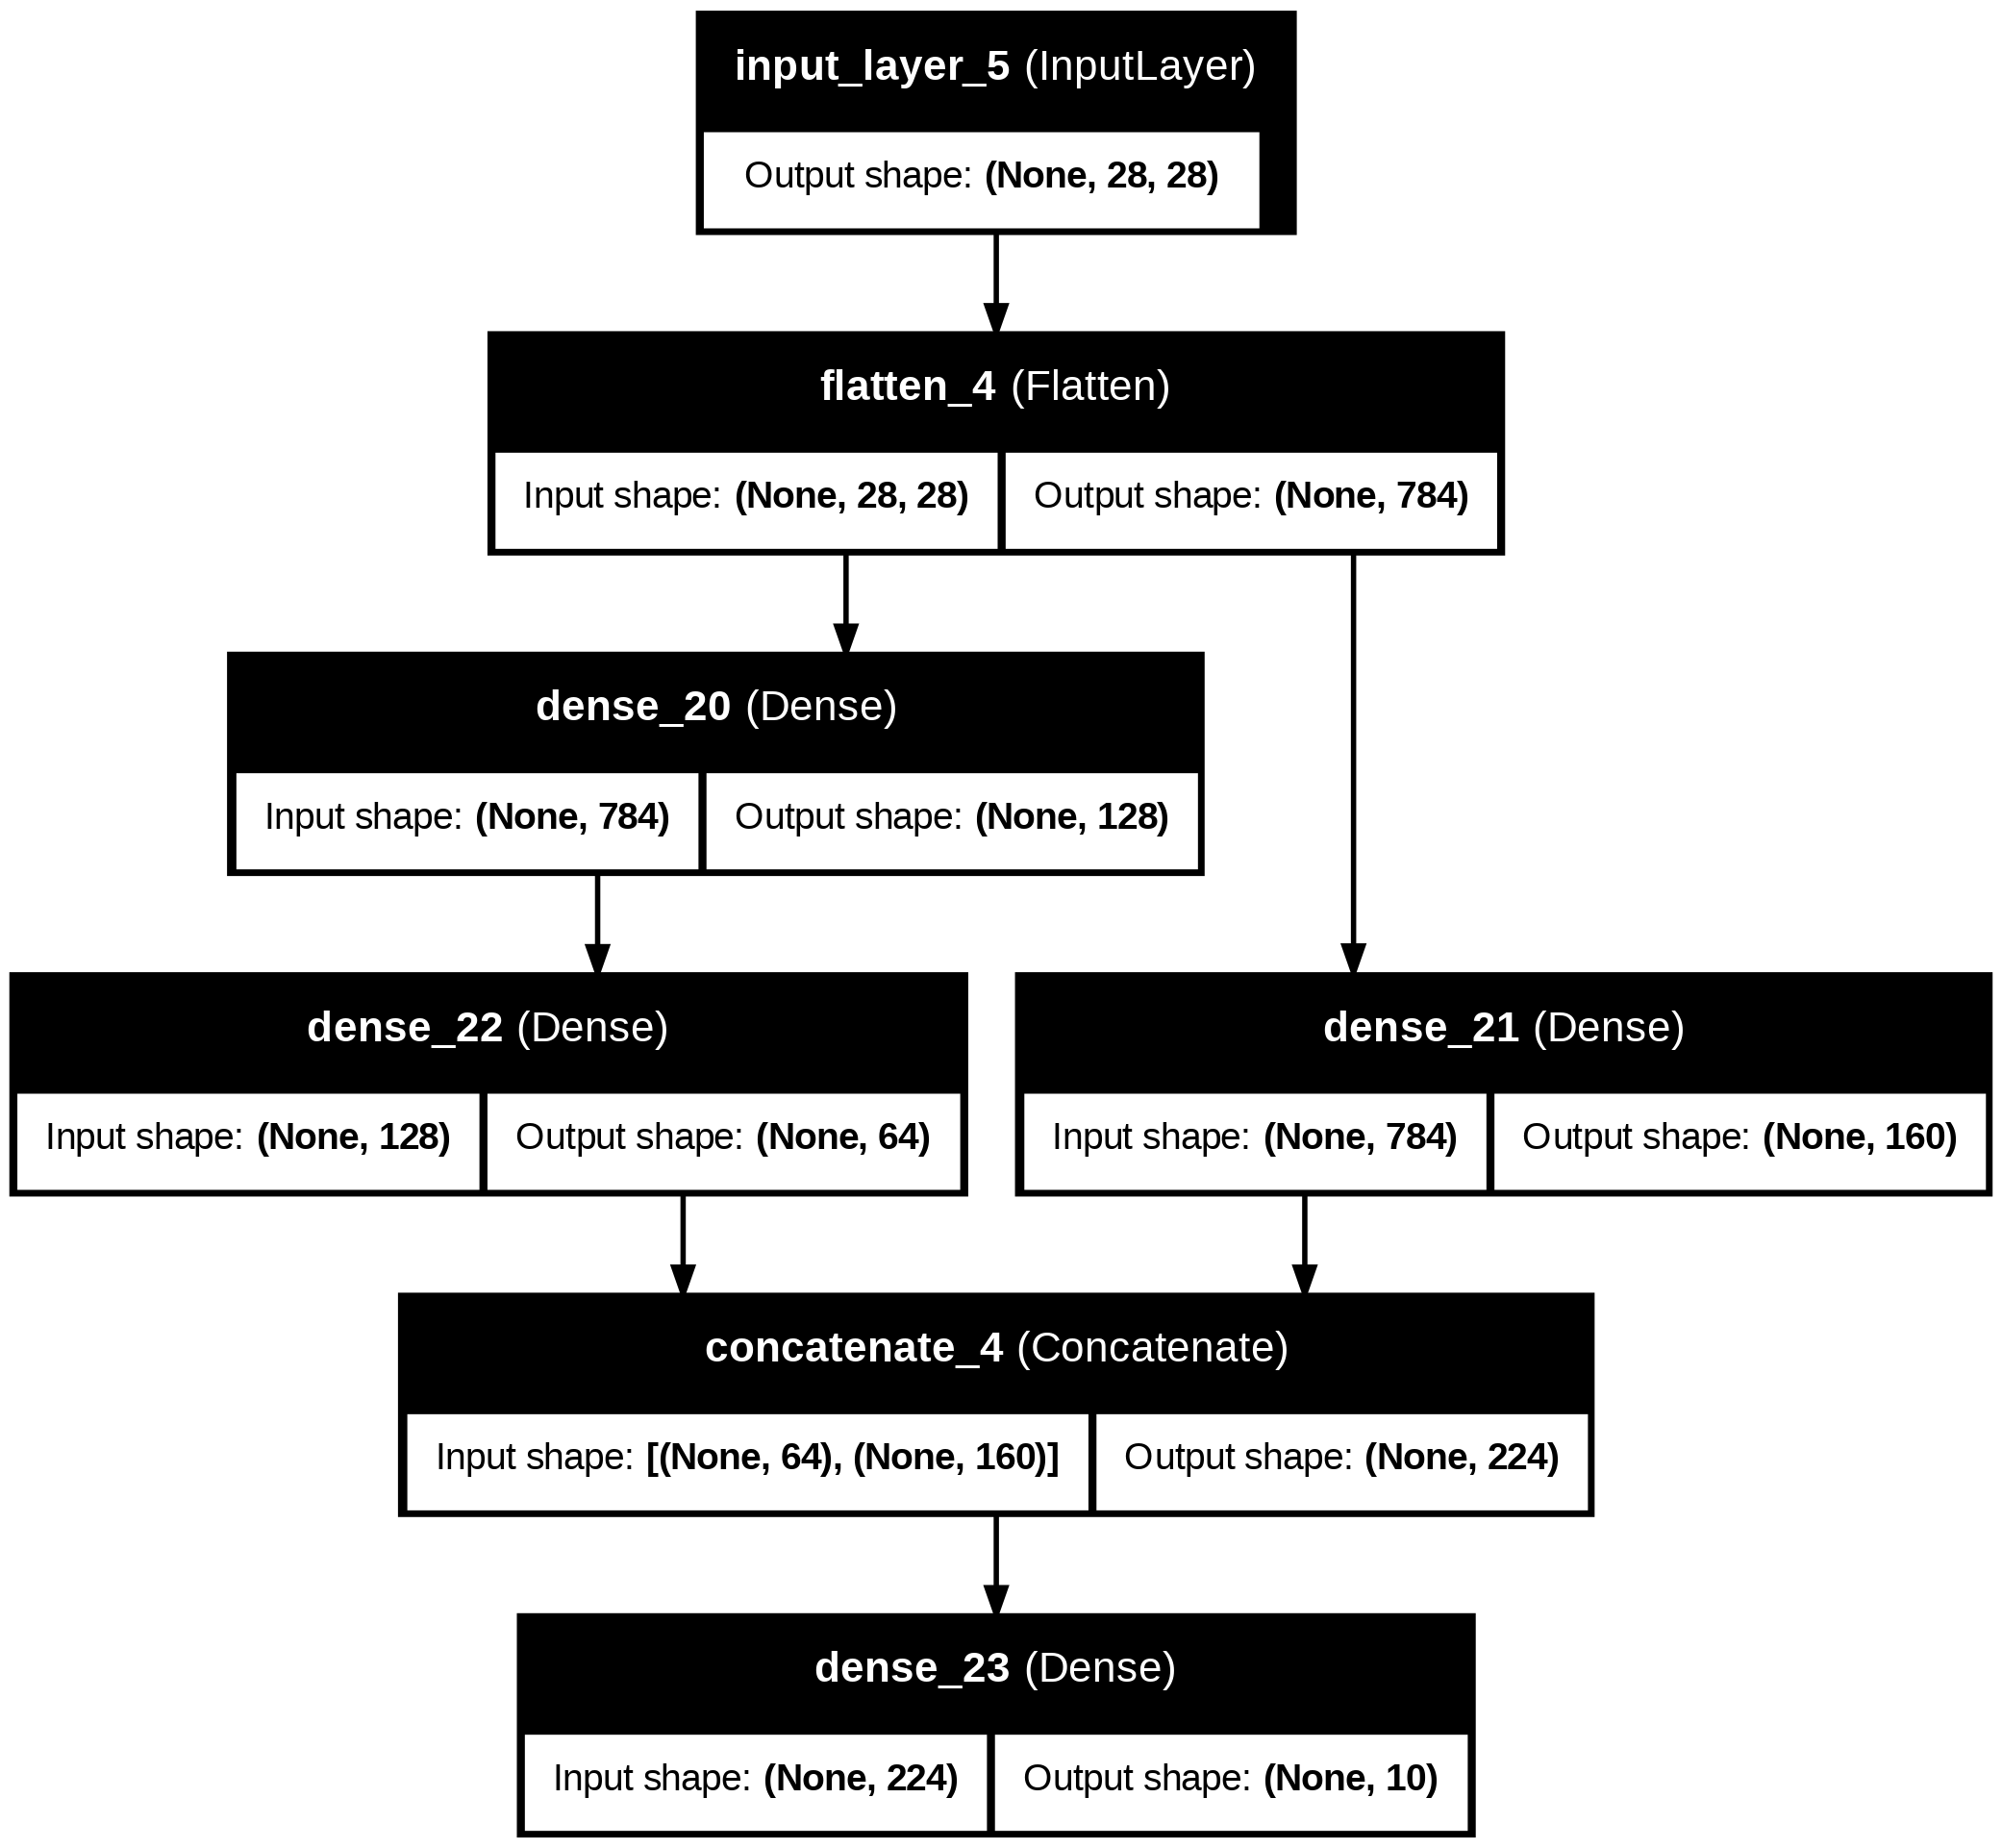

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

### Compiling the Complex Model

We compile the complex neural network using:
- **Optimizer**: Adam (fast convergence with adaptive learning rate).
- **Loss**: Categorical Crossentropy (multi-class classification).
- **Metric**: Accuracy.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the Complex Model

We train the model for **5 epochs** with batch size 32.

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9367 - loss: 0.2130
Epoch 2/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9736 - loss: 0.0872
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9812 - loss: 0.0599
Epoch 4/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9862 - loss: 0.0417
Epoch 5/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9898 - loss: 0.0313


The accuracy improves steadily and the loss decreases significantly, showing that the deeper architecture learns features more effectively than the simple model.

### Model Evaluation

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0968


[0.0793563649058342, 0.9768000245094299]

On the test dataset:
- **Accuracy**: ~97.2%
- **Loss**: ~0.0968  

This confirms the **complex model generalizes better** than the simple one (~87%), due to its deeper architecture and higher capacity.